In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np

In [2]:
!pip install pydotplus

In [3]:
#데이터프레임으로 데이터 읽어오기
df = pd.read_csv("dataset/pasteurizer.csv")

In [4]:
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
210789,2020-11-11 18:34,NaN,NaN,586.0,566.0,OK
210790,2020-11-11 18:35,NaN,NaN,582.0,569.0,OK
210791,2020-11-11 18:36,NaN,NaN,577.0,572.0,OK
210792,2020-11-11 18:37,NaN,NaN,572.0,575.0,OK


In [5]:
df.columns

Index(['STD_DT', 'MIXA_PASTEUR_STATE', 'MIXB_PASTEUR_STATE',
       'MIXA_PASTEUR_TEMP', 'MIXB_PASTEUR_TEMP', 'INSP'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210794 entries, 0 to 210793
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STD_DT              210794 non-null  object 
 1   MIXA_PASTEUR_STATE  11135 non-null   float64
 2   MIXB_PASTEUR_STATE  10255 non-null   float64
 3   MIXA_PASTEUR_TEMP   201423 non-null  float64
 4   MIXB_PASTEUR_TEMP   198802 non-null  float64
 5   INSP                210794 non-null  object 
dtypes: float64(4), object(2)
memory usage: 9.6+ MB


In [7]:
df.describe()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
count,1.113500e+04,10255.000000,201423.000000,1.988020e+05
mean,5.032693e+04,633.200390,566.867528,1.862568e+04
std,5.286901e+05,6408.270847,69.061703,8.111731e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000,543.000000,5.420000e+02
50%,1.000000e+00,1.000000,570.000000,5.690000e+02
75%,1.000000e+00,1.000000,596.000000,5.950000e+02
max,5.603841e+06,65536.000000,772.000000,4.279501e+07


In [8]:
df.shape

(210794, 6)

In [9]:
#INSP칼럼의 개수 확인
df['INSP'].value_counts()

OK    133010
NG     77784
Name: INSP, dtype: int64

In [10]:
#컬럼별 NULL 개수 확인
df.isna().sum()

STD_DT                     0
MIXA_PASTEUR_STATE    199659
MIXB_PASTEUR_STATE    200539
MIXA_PASTEUR_TEMP       9371
MIXB_PASTEUR_TEMP      11992
INSP                       0
dtype: int64

In [11]:
#결측치 제거(null 값이 있는 행 삭제)
df = df.dropna()

In [12]:
#결측치 제거가 잘 되었는지 확인
df.isna().sum()

STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

(array([9383.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         100.]),
 array([      0. ,  560384.1, 1120768.2, 1681152.3, 2241536.4, 2801920.5,
        3362304.6, 3922688.7, 4483072.8, 5043456.9, 5603841. ]),
 <BarContainer object of 10 artists>)

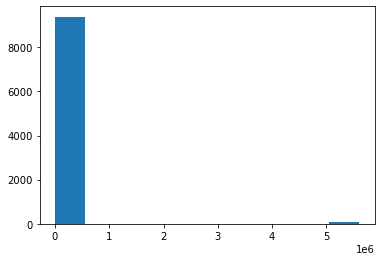

In [13]:
#히스토그램 확인 -> 데이터의 분포, 중심 경향, 치우침 등을 파악
plt.hist(df['MIXA_PASTEUR_STATE'])

(array([9384.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          99.]),
 array([    0. ,  6553.6, 13107.2, 19660.8, 26214.4, 32768. , 39321.6,
        45875.2, 52428.8, 58982.4, 65536. ]),
 <BarContainer object of 10 artists>)

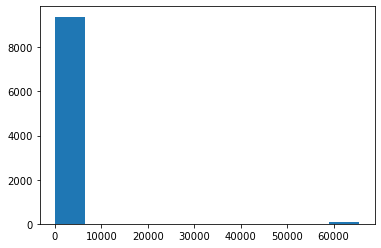

In [14]:
plt.hist(df['MIXB_PASTEUR_STATE'])

In [15]:
#컬럼의 유일값 파악
df['MIXA_PASTEUR_STATE'].unique()

array([1.000000e+00, 5.603841e+06, 0.000000e+00])

In [16]:
#MIXA_PASTEUR_STATE의 값은 0(정지) 또는 1(가동)이어야 하고 그 이상의 값은 잘못된 값이므로 제거 -> df에 MIXA_PASTEUR_STATE가 2 미만인 값들만 넣어줌
df = df[df.MIXA_PASTEUR_STATE < 2]

In [17]:
df

,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,2020-03-04 6:00,1.0,1.0,551.0,524.0,OK
1,2020-03-04 6:30,1.0,1.0,584.0,536.0,OK
2,2020-03-04 7:00,1.0,1.0,584.0,536.0,OK
3,2020-03-04 7:30,1.0,1.0,585.0,536.0,OK
4,2020-03-04 8:00,1.0,1.0,585.0,536.0,OK
...,...,...,...,...,...,...
160703,2020-09-15 15:00,1.0,1.0,560.0,580.0,OK
160734,2020-09-15 15:30,1.0,1.0,588.0,555.0,OK
160765,2020-09-15 16:00,1.0,1.0,588.0,550.0,OK
160796,2020-09-15 16:30,1.0,1.0,595.0,555.0,OK


(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

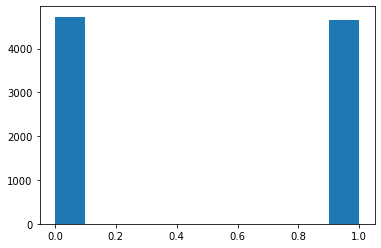

In [18]:
#값 수정 후 히스토그램 확인
plt.hist(df['MIXA_PASTEUR_STATE'])

(array([4729.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4654.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

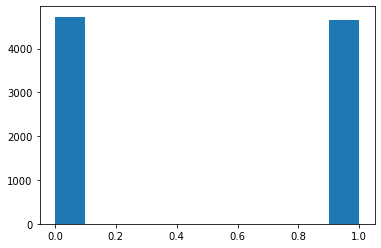

In [19]:
plt.hist(df['MIXB_PASTEUR_STATE'])

(array([   7.,    0.,    0., 2720.,  158.,  241., 1688., 4304.,  238.,
          27.]),
 array([  0. ,  77.2, 154.4, 231.6, 308.8, 386. , 463.2, 540.4, 617.6,
        694.8, 772. ]),
 <BarContainer object of 10 artists>)

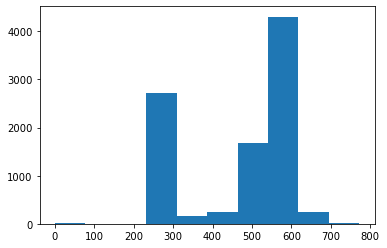

In [20]:
plt.hist(df['MIXA_PASTEUR_TEMP'])

(array([   7.,    0.,    0., 1749., 1423.,   10., 1487., 4418.,  250.,
          39.]),
 array([  0. ,  76.5, 153. , 229.5, 306. , 382.5, 459. , 535.5, 612. ,
        688.5, 765. ]),
 <BarContainer object of 10 artists>)

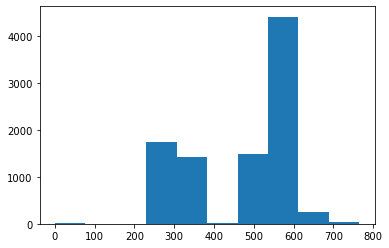

In [21]:
plt.hist(df['MIXB_PASTEUR_TEMP'])

array([[<AxesSubplot:title={'center':'MIXA_PASTEUR_STATE'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_STATE'}>],
       [<AxesSubplot:title={'center':'MIXA_PASTEUR_TEMP'}>,
        <AxesSubplot:title={'center':'MIXB_PASTEUR_TEMP'}>]], dtype=object)

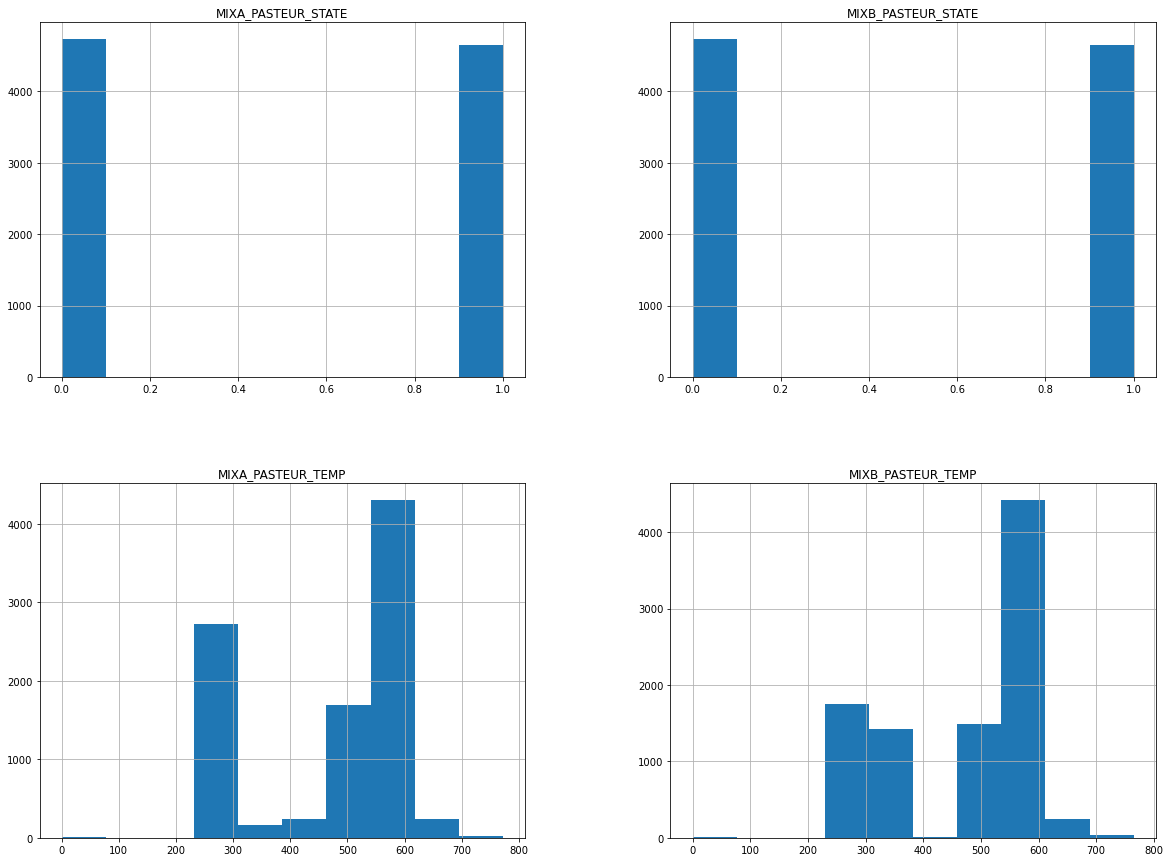

In [22]:
#히스토그램 한번에 표시
df.hist(bins=10, figsize=(20, 15))

In [23]:
#특성 간 상관관계확인
df.corr()

,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP
MIXA_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXB_PASTEUR_STATE,1.000000,1.000000,0.523328,0.465706
MIXA_PASTEUR_TEMP,0.523328,0.523328,1.000000,0.920102
MIXB_PASTEUR_TEMP,0.465706,0.465706,0.920102,1.000000


<AxesSubplot:>

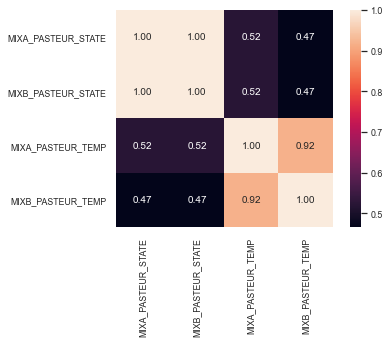

In [24]:
#상관관계를 확인하기 쉽게 히트맵으로 표현
names = ['MIXA_PASTEUR_STATE','MIXB_PASTEUR_STATE','MIXA_PASTEUR_TEMP','MIXB_PASTEUR_TEMP']
data = np.corrcoef(df[names].values.T)
sns.set(font_scale=0.8)
sns.heatmap(data, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=names, xticklabels=names)

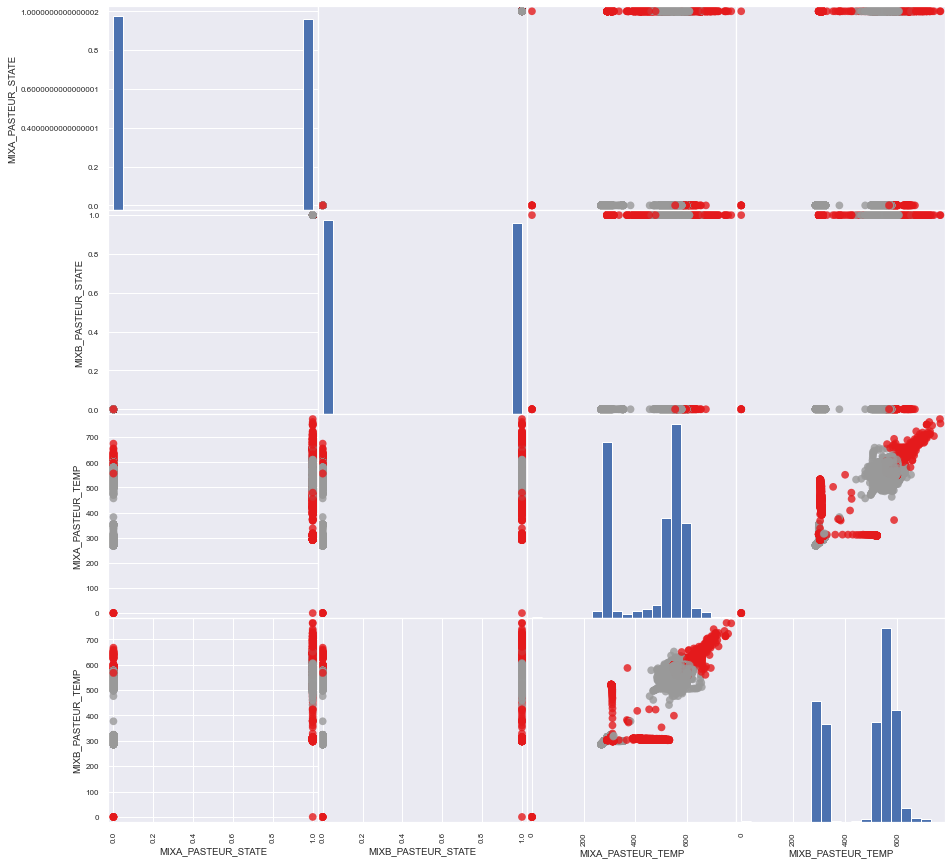

In [25]:
#산점도 매트릭스를 통해 상관관계 패턴 확인
y = df.iloc[:,-1:].values
y = np.where(y == 'OK', 1, 0)
y = y.ravel()
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,cmap=plt.cm.Set1)
plt.show()

In [26]:
#학습용 데이터와 테스트용 데이터로 분리
X = df.iloc[:,1:5].values
y = df.iloc[:,-1:].values
#iloc으로 값을 받아오면 numpy의 ndarray형으로 받아온다.
y = np.where(y == 'OK', 1, 0)
y = y.ravel()
print(X.shape, y.shape)

(9383, 4) (9383,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  1.,   1., 543., 578.],
       [  1.,   1., 594., 583.],
       [  1.,   1., 582., 542.]])

In [29]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf = dt_clf.fit(X_train, y_train)
dt_prediction = dt_clf.predict(X_test)

In [30]:
feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_name = np.array(['0','1'])

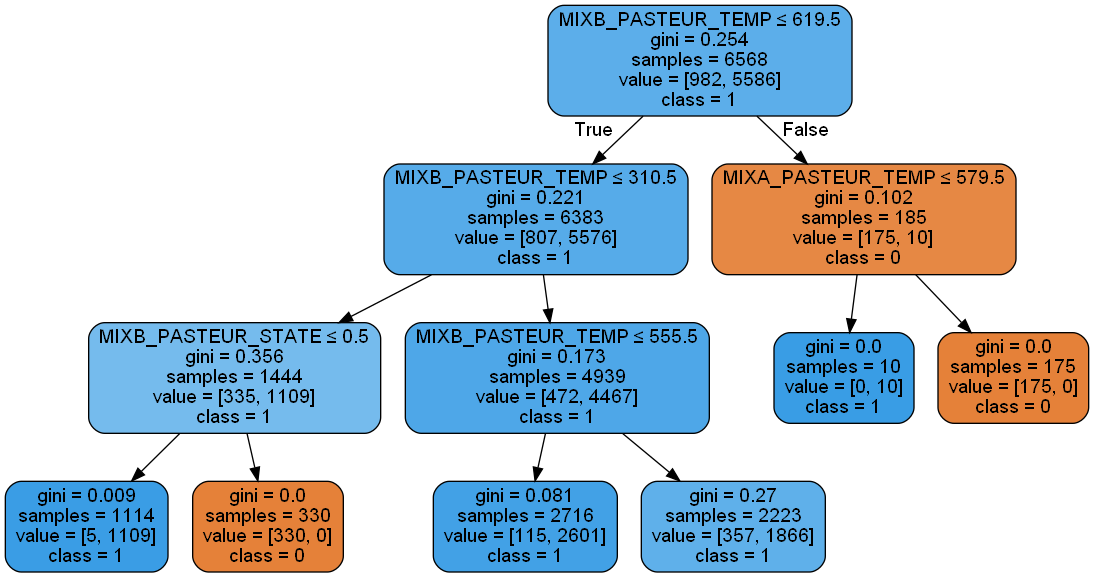

In [31]:
dt_dot_data = tree.export_graphviz(dt_clf, feature_names=feature_names, class_names=target_name, filled=True, rounded=True, special_characters=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
dtg = Image(dt_graph.create_png())
dtg

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [33]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy: .4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, F1: {f1: .4f}, AUC: {roc_auc: .4f}')
    
get_clf_eval(y_test, dt_prediction)

오차 행렬
[[ 237  196]
 [   1 2381]]
정확도:  0.9300, 정밀도:  0.9239, 재현율:  0.9996, F1:  0.9603, AUC:  0.7735
